In [22]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  6612k      0 --:--:--  0:00:03 --:--:-- 6668k


In [3]:
with open('turnstile_150627.txt') as f:    #open the link to the data
    reader = csv.reader(f)    #read in the data
    rows = [[cell.strip() for cell in row] for row in reader]    #loop over the rows and within the rows to extract the data and remove any whitespace from the beginning and end

In [4]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']    #check to make sure that we have the correct variable names

In [5]:
raw_readings = {}    #an empty dictionary
for row in rows:    #loop over the elements in the list rows
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))    #loop over the rows, add new keys to the dictionary when the row info is not already present, append to existing data when it is

In [6]:
type(raw_readings)

dict

In [7]:
practice = raw_readings[('J001', 'R460', '01-00-01', 'MARCY AVE')][0]
print(practice)

('JMZ', 'BMT', '06/20/2015', '01:00:00', 'REGULAR', '0007012983', '0001986648')


In [13]:
type(practice)

tuple

In [15]:
first1pair = {k: raw_readings.keys[k] for k in raw_readings.keys()[:2]}

TypeError: 'dict_keys' object is not subscriptable

In [7]:
raw_readings.keys()    #the dictionary raw_readings solves challenge 1

dict_keys([('R169', 'R168', '01-03-00', '96 ST'), ('N305', 'R017', '01-00-05', 'LEXINGTON-53 ST'), ('R523', 'R147', '00-00-06', '61 ST/WOODSIDE'), ('C018', 'R197', '00-00-01', '36 ST'), ('N030', 'R333', '00-00-00', '116 ST'), ('N196', 'R285', '00-03-01', 'FAR ROCKAWAY'), ('N307', 'R359', '00-06-00', 'COURT SQ-23 ST'), ('R610', 'R057', '00-06-00', 'BARCLAYS CENTER'), ('G015', 'R312', '01-06-01', 'W 8 ST-AQUARIUM'), ('B019', 'R149', '00-00-01', 'NEWKIRK PLAZA'), ('J001', 'R460', '01-00-01', 'MARCY AVE'), ('N187', 'R419', '00-00-01', 'ROCKAWAY PK 116'), ('H015', 'R250', '01-00-02', 'GRAND ST'), ('N080', 'R138', '00-00-00', 'W 4 ST-WASH SQ'), ('R515', 'R095', '00-03-00', 'DITMARS BL-31 S'), ('R417', 'R222', '00-03-04', 'E 177 ST-PARKCH'), ('R143', 'R032', '02-00-03', '42 ST-TIMES SQ'), ('R317', 'R408', '01-00-02', 'SIMPSON ST'), ('R625', 'R062', '01-00-02', 'CROWN HTS-UTICA'), ('B015', 'R098', '01-00-02', 'CHURCH AVE'), ('R113', 'R028', '01-04-00', 'FULTON ST'), ('R197', 'R117', '00-03-00'

In [8]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,'%m/%d/%Y%X'),int(in_cumulative))
                                   for _, _, date, time,_, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}  #make a new dictionary; the keys will be the turnstiles, and each will have a list of tuples consisting of date and cumulative total

In [31]:
type(datetime_cumulative)

dict

In [15]:
practice2 = datetime_cumulative[('J001', 'R460', '01-00-01', 'MARCY AVE')][0]
print(practice2)


(datetime.datetime(2015, 6, 20, 1, 0), 7012983)


In [36]:
print(datetime_cumulative.keys())[0].items()

dict_keys([('R169', 'R168', '01-03-00', '96 ST'), ('N305', 'R017', '01-00-05', 'LEXINGTON-53 ST'), ('C018', 'R197', '00-00-01', '36 ST'), ('N030', 'R333', '00-00-00', '116 ST'), ('N196', 'R285', '00-03-01', 'FAR ROCKAWAY'), ('N307', 'R359', '00-06-00', 'COURT SQ-23 ST'), ('R610', 'R057', '00-06-00', 'BARCLAYS CENTER'), ('G015', 'R312', '01-06-01', 'W 8 ST-AQUARIUM'), ('B019', 'R149', '00-00-01', 'NEWKIRK PLAZA'), ('J001', 'R460', '01-00-01', 'MARCY AVE'), ('N187', 'R419', '00-00-01', 'ROCKAWAY PK 116'), ('H015', 'R250', '01-00-02', 'GRAND ST'), ('N080', 'R138', '00-00-00', 'W 4 ST-WASH SQ'), ('R143', 'R032', '02-00-03', '42 ST-TIMES SQ'), ('B015', 'R098', '01-00-02', 'CHURCH AVE'), ('R113', 'R028', '01-04-00', 'FULTON ST'), ('PTH05', 'R543', '00-01-01', 'EXCHANGE PLACE'), ('R111', 'R027', '00-00-01', 'WALL ST'), ('A077', 'R028', '03-00-00', 'FULTON ST'), ('R245A', 'R051', '01-06-01', '59 ST'), ('N305', 'R017', '01-03-03', 'LEXINGTON-53 ST'), ('C027', 'R216', '00-03-01', 'BAY RIDGE-95 S

TypeError: 'NoneType' object is not subscriptable

In [9]:
for rows in datetime_cumulative.values():    #loop over the time series
    assert rows == sorted(rows)    #and ensure that each is in the correct order in time - note that tuples are sorted by first element

In [10]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}    #make a new dictionary; keys will be the turnstiles, each will have a list of lists, each of which will give date, change in entries from last time, and elasped time

In [11]:
type(datetime_count_times)
      
practice3 = datetime_count_times[('J001', 'R460', '01-00-01', 'MARCY AVE')][0]
print(practice3)


[datetime.datetime(2015, 6, 20, 1, 0), 30, datetime.timedelta(0, 14400)]


In [12]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}    #make one more dictionary; keys will be turnstiles, each will have a list of lists with date and change in entries

In [55]:
datetime_counts.keys()    #the dictionary datetime_counts solves challenge 2

dict_keys([('R169', 'R168', '01-03-00', '96 ST'), ('N305', 'R017', '01-00-05', 'LEXINGTON-53 ST'), ('C018', 'R197', '00-00-01', '36 ST'), ('N030', 'R333', '00-00-00', '116 ST'), ('N196', 'R285', '00-03-01', 'FAR ROCKAWAY'), ('N307', 'R359', '00-06-00', 'COURT SQ-23 ST'), ('R610', 'R057', '00-06-00', 'BARCLAYS CENTER'), ('N103', 'R127', '00-00-01', 'JAY ST-METROTEC'), ('B019', 'R149', '00-00-01', 'NEWKIRK PLAZA'), ('J001', 'R460', '01-00-01', 'MARCY AVE'), ('N187', 'R419', '00-00-01', 'ROCKAWAY PK 116'), ('H015', 'R250', '01-00-02', 'GRAND ST'), ('N080', 'R138', '00-00-00', 'W 4 ST-WASH SQ'), ('R145', 'R032', '00-00-00', '42 ST-TIMES SQ'), ('R143', 'R032', '02-00-03', '42 ST-TIMES SQ'), ('R317', 'R408', '01-00-02', 'SIMPSON ST'), ('B015', 'R098', '01-00-02', 'CHURCH AVE'), ('R113', 'R028', '01-04-00', 'FULTON ST'), ('PTH05', 'R543', '00-01-01', 'EXCHANGE PLACE'), ('R111', 'R027', '00-00-01', 'WALL ST'), ('A077', 'R028', '03-00-00', 'FULTON ST'), ('R245A', 'R051', '01-06-01', '59 ST'), (

In [13]:
day_counts = {}    #an empty dictionary to hold the total counts
for turnstile, rows in datetime_counts.items():    #loop over key/data pairs in datetime_counts
    by_day = {}    #for each make a new empty dictionary
    for time, count in rows:    #loop over the time and the count
        day = time.date()    #keep only the day info
        by_day[day] = by_day.get(day, 0) + count    #pull out the data associated with key <day> and add the count to it - if <day> is in the dictionary return 0
    day_counts[turnstile] = sorted(by_day.items())    #save the count by turnstile in the dictionary

In [38]:
by_day.items()

dict_items([(datetime.date(2015, 6, 22), 2963), (datetime.date(2015, 6, 24), 3087), (datetime.date(2015, 6, 21), 1095), (datetime.date(2015, 6, 26), 2836), (datetime.date(2015, 6, 25), 3035), (datetime.date(2015, 6, 20), 1430), (datetime.date(2015, 6, 23), 2963)])

In [19]:
day_counts.items()    #the dictionary day_counts solves challenge 3

dict_items([(('N057', 'R188', '00-00-00', '50 ST'), [(datetime.date(2015, 6, 20), 3072), (datetime.date(2015, 6, 21), 2464), (datetime.date(2015, 6, 22), 3481), (datetime.date(2015, 6, 23), 3753), (datetime.date(2015, 6, 24), 4119), (datetime.date(2015, 6, 25), 3996), (datetime.date(2015, 6, 26), 3656)]), (('N419', 'R287', '00-00-02', 'CLASSON AVE'), [(datetime.date(2015, 6, 20), 1507), (datetime.date(2015, 6, 21), 1224), (datetime.date(2015, 6, 22), 1910), (datetime.date(2015, 6, 23), 2025), (datetime.date(2015, 6, 24), 2174), (datetime.date(2015, 6, 25), 2069), (datetime.date(2015, 6, 26), 1929)]), (('E004', 'R234', '00-00-00', '50 ST'), [(datetime.date(2015, 6, 20), 324), (datetime.date(2015, 6, 21), 486), (datetime.date(2015, 6, 22), 1385), (datetime.date(2015, 6, 23), 1263), (datetime.date(2015, 6, 24), 1307), (datetime.date(2015, 6, 25), 1318), (datetime.date(2015, 6, 26), 1036)]), (('R126', 'R189', '01-00-02', 'CHRISTOPHER ST'), [(datetime.date(2015, 6, 20), 690), (datetime.date

In [23]:
%matplotlib inline

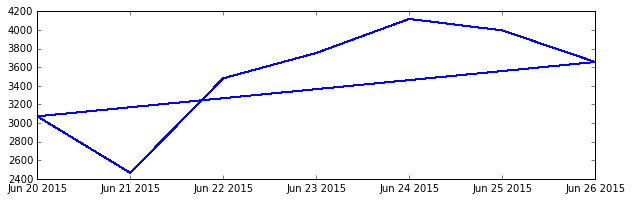

In [24]:
counts = []
dates = []
for item in day_counts.items():
    for date, count in rows:
        counts.append(count)
        dates.append(date)

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
    

In [15]:
by_station = {}
for station_info, value in datetime_counts.items():
    a = by_station.get((station_info[0], station_info[1], station_info[3]), [])
    a.extend(value)   
    by_station[(station_info[0], station_info[1], station_info[3])] = a


In [47]:
def station_graph(station):
    counts = []
    dates = []
    for date, count in station:
        counts.append(count)
        dates.append(date)

                 
    plt.figure(figsize=(20,5))
    plt.plot(dates,counts, 'bo')

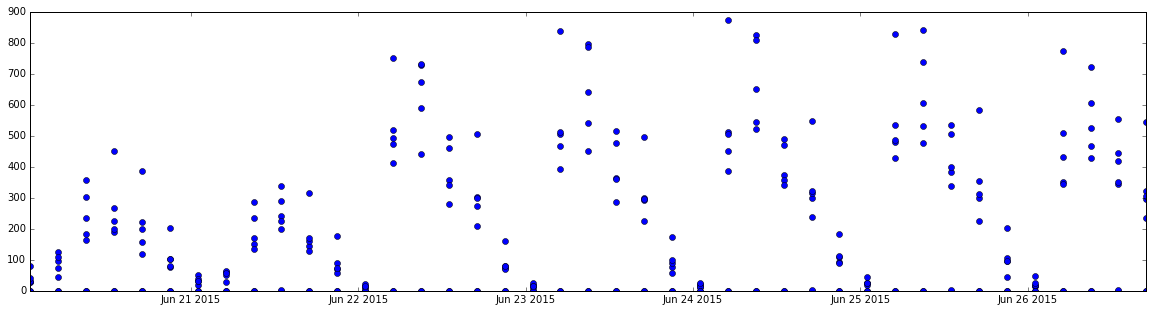

In [48]:
station_graph(by_station[('J001', 'R460', 'MARCY AVE')])

In [ ]:
    for a, b, _, d in station_info:
        station_info = (a, b, d)
    station_counts[station_info] = value

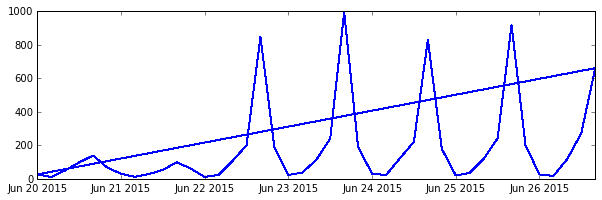

In [25]:
counts = []
dates = []
for item in by_station.items():
    for date, count in rows:
        counts.append(count)
        dates.append(date)

plt.figure(figsize=(10,3))
plt.plot(dates,counts)